CLUSTERING ASSIGNMENT

1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
- K-means clustering > Partitioning method that divides data into pre-determined number of k spherical clusters.
  - Faster and more efficient for huge dataset.
  - Used for numerical data.
  - Centroid is calculated.
  - Use case: Customer Segmentation of a marketing company can use k-means clustering to saggregate it's customer base into distinct groups.
- Hierarchial clustering > Creates a tree like structure called dendograms of nested cluster without a pre-set k.
  - Used for small categorical dataset.
  - No centroid is calculated.
  - Use case: Biological Taxonomy to find evolutionary relationship between different species.

2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
- Silhouette Score is a metric used to evaluate the quality of clustering resluts in unsupervised learning.
- Silhouette Score = (b - a) / max(a, b)
- Formula produces a score ranging from -1 to 1.
- The value nearer to1 represents good clustering algorithm.

3. What are the core parameters of DBSCAN, and how do they influence the clustering process?
- The core parameters for the DBSCAN clustering algorithm are:
  - Epsilon (ε) > A distance value that defines the radius of a point's neighborhood. Any two points within this radius are considered neighbors.
  - MinPts > The minimum number of data points required within a point's ε-neighborhood for that point to be classified as a "core point".
- These parameters influence clustering by affecting cluster granularity and noise sensitivity: a smaller ε or higher MinPts can lead to more, smaller, and robust clusters, while a larger ε or lower MinPts might result in larger clusters or more noise points.  

4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
- Feature scaling is crucial when applying clustering algorithms like K-Means and DBSCAN because these algorithms rely heavily on distance metrics to determine cluster assignments.
- Without scaling, features with larger numerical ranges can disproportionately influence these distance calculations, leading to biased and inaccurate clustering results.
- Feature scaling normalizes or standardizes the ranges of different features, ensuring that each feature contributes equitably to the distance calculations and, therefore, to the accurate and meaningful formation of clusters.

5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
- The Elbow Method is a visual technique for selecting the optimal number of clusters (k) in K-Means clustering by plotting the Within-Cluster Sum of Squares (WCSS) against different values of k.
- The point where the graph's rate of decrease slows down, forming an "elbow," indicates that adding more clusters provides diminishing returns and suggests the ideal k value.

6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

In [1]:
#Generate Synthetic Data
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300, centers=4, random_state=42)

In [2]:
#Apply k means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [3]:
#Predict cluster labels
y_kmeans = kmeans.predict(x)

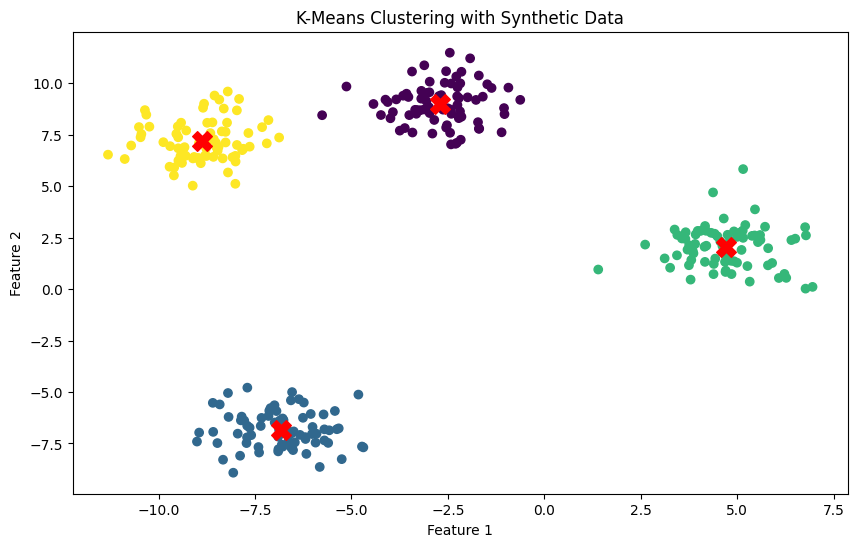

In [4]:
#Visualizations
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis')

#plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', c='red')
plt.title('K-Means Clustering with Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [5]:
#load wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data

In [8]:
#apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
#apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(x_scaled)

DBSCAN(eps=2)

In [12]:
#cluster labels
labels = dbscan.labels_

#count clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 5


8. Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

In [15]:
#moon-shaped synthetic data
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.1, random_state=42)

In [16]:
#apply dbscan
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(x)

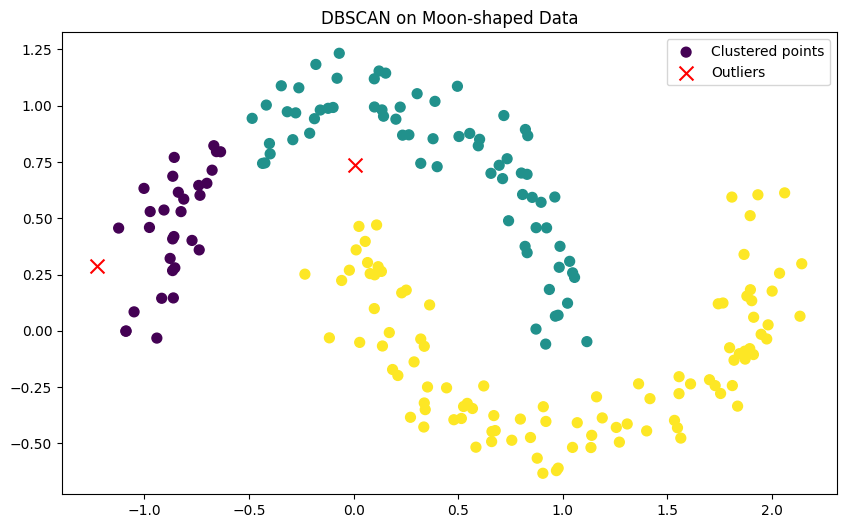

In [17]:
#plot cluster
plt.figure(figsize=(10,6))
plt.scatter(x[labels >= 0, 0], x[labels >= 0, 1],
    c=labels[labels >= 0], cmap='viridis', s=50, label="Clustered points")

#highlight the outliers
plt.scatter(x[labels == -1, 0], x[labels == -1, 1],
            c='red', marker='x', s=100, label="Outliers")

plt.title("DBSCAN on Moon-shaped Data")
plt.legend()
plt.show()

9. Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

In [18]:
#load wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data

In [19]:
#apply pca > reduce dimension to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [20]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(x_pca)

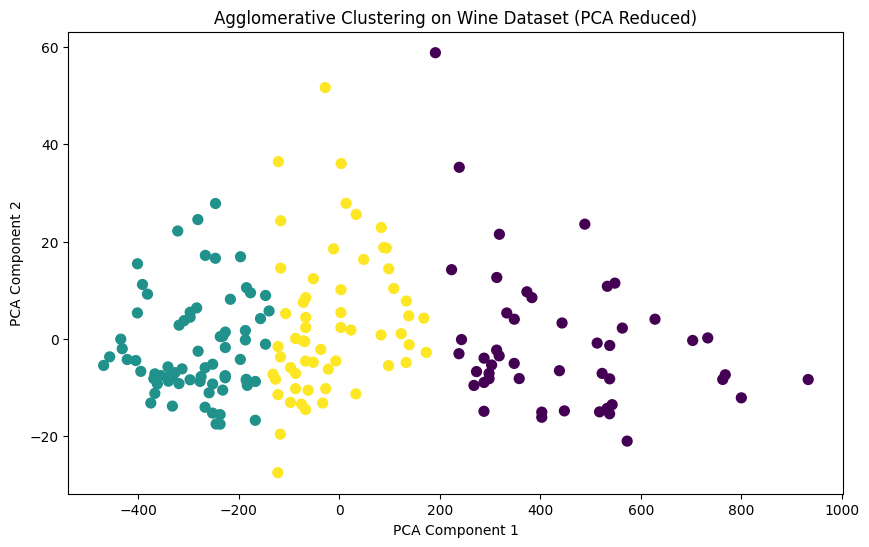

In [21]:
#visualization
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering on Wine Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?

In [23]:
#load tips dataset
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
#select numeric features for clustering
x = tips[['total_bill', 'tip', 'size']]

In [25]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
#k means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
tips['cluster'] = kmeans.fit_predict(x_scaled)

In [28]:
#dimensionalty reduction using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

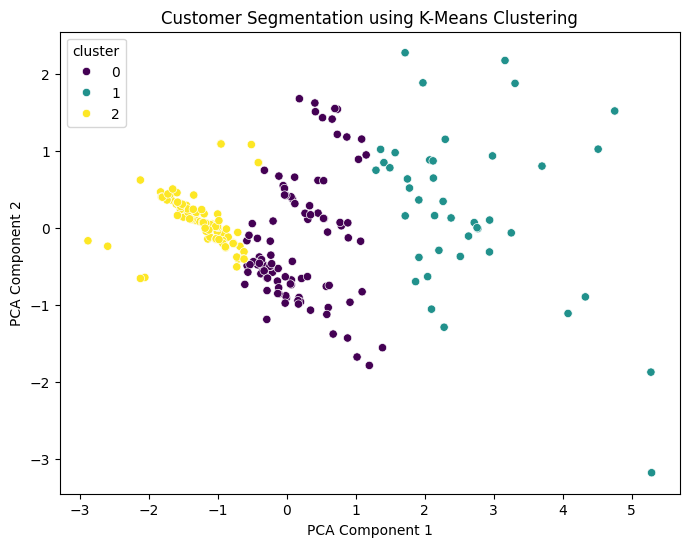

In [31]:
#visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=tips['cluster'], palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [33]:
#cluster summary
print(tips.groupby('cluster')[['total_bill','tip','size']].mean())

         total_bill       tip      size
cluster                                
0         21.167900  3.260600  2.490000
1         33.494524  4.873095  4.119048
2         12.786373  1.969118  2.009804


1. We have used k means clustering because dataset is large.
2. We have preprocessed the data using feature scaling technique.
3. To determine clusters the value of k is taken from scatter plot.
4. Business team can target the customer by their expenditure pattern.